## Carga del archivo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

ruta = "Dataset Cc.csv"  
batch_size = 10000  

# lista para almacenar cada batch
batches = []

# se lee el dataset por partes y  se guarda en la lista
for chunk in pd.read_csv(ruta, chunksize=batch_size):
    batches.append(chunk)

# se unen todos los batches en un dataframe
df1 = pd.concat(batches, ignore_index=True)

df1.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN
5,200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.6780,Residential,Single Family,NaN,NaN,NaN,NaN
6,2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
7,2020313,2020,07/01/2021,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.6081,Residential,Single Family,NaN,NaN,NaN,NaN
8,200097,2020,06/04/2021,Bethany,23 AMITY RD,511000.0,795000.0,0.6427,Commercial,NaN,NaN,NaN,NaN,NaN
9,20139,2020,12/16/2020,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,0.5115,Residential,Single Family,NaN,NaN,NaN,NaN


## Se identifican las columnas que se van a usar

In [3]:
df = df1[['List Year', 'Date Recorded', 'Assessed Value', 'Sale Amount', 
          'Property Type', 'Residential Type', 'Town']]

df

,List Year,Date Recorded,Assessed Value,Sale Amount,Property Type,Residential Type,Town
0,2020,09/13/2021,150500.0,325000.0,Commercial,NaN,Ansonia
1,2020,10/02/2020,253000.0,430000.0,Residential,Single Family,Ashford
2,2020,03/09/2021,130400.0,179900.0,Residential,Condo,Avon
3,2020,04/13/2021,619290.0,890000.0,Residential,Single Family,Avon
4,2020,07/02/2021,862330.0,1447500.0,Residential,Single Family,Avon
...,...,...,...,...,...,...,...
997208,2019,06/24/2020,60410.0,53100.0,Single Family,Single Family,New London
997209,2019,11/27/2019,68280.0,76000.0,Single Family,Single Family,Waterbury
997210,2019,04/27/2020,121450.0,210000.0,Single Family,Single Family,Windsor Locks
997211,2019,06/03/2020,203360.0,280000.0,Single Family,Single Family,Middletown


In [4]:
#averiguar que columnas tienen valores nulos y cuantos
df.isnull().sum()

List Year                0
Date Recorded            2
Assessed Value           0
Sale Amount              0
Property Type       382446
Residential Type    388309
Town                     0
dtype: int64

In [5]:
# Ver la distribución de 'Property Type' (incluyendo NaN)
print(df['Property Type'].value_counts(dropna=False))
print('_______________________\n')

# Ver la distribución de 'Residential Type' (incluyendo NaN)
print(df['Residential Type'].value_counts(dropna=False))

Property Type
Single Family     401612
NaN               382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64
_______________________

Residential Type
Single Family    445016
NaN              388309
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64


* Hay 382,446 registros donde Property Type es nulo y 388,309 donde Residential Type es nulo.
* Entre los valores no nulos en Property Type, predominan categorías residenciales (por ejemplo, "Single Family", "Condo", etc.).

In [6]:
# Filtrar registros con Residential Type nulo y ver su distribución en Property Type
nulos_residential = df[df['Residential Type'].isnull()]
print(nulos_residential['Property Type'].value_counts(dropna=False))

Property Type
NaN               382446
Vacant Land         3163
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64


Al filtrar las filas donde Residential Type es nulo en la mayoría de los 382,446 registros Property Type es nulo.
Hay un subconjunto de registros que, aunque tengan Residential Type nulo, Property Type contiene valores como "Vacant Land", "Commercial", "Apartments", "Industrial" o "Public Utility".

Esto sugiere que en los registros donde Residential Type es nulo y Property Type indica categorías no residenciales (por ejemplo, "Commercial" o "Vacant Land") y probablemente el campo de tipo residencial no aplica. Por ello, se podria recodificar estos nulos para distinguir entre:

Casos en que la propiedad no es residencial: asignar un valor como "Does not apply".
Otros casos donde no se conoce la información: asignar algo como "Unknown" o "Not specified".

In [7]:
df = df.copy()

# Definir la lista de tipos de propiedades no residenciales
non_residential_property_types = ['Commercial', 'Vacant Land', 'Apartments', 'Industrial', 'Public Utility']

# Recodificar 'Residential Type' para registros no residenciales:
df.loc[
    (df['Residential Type'].isnull()) & (df['Property Type'].isin(non_residential_property_types)),
    'Residential Type'
] = 'Does not apply'

# Para el resto de los nulos en 'Residential Type', asignar "Desconocido" usando .loc
df.loc[:, 'Residential Type'] = df.loc[:, 'Residential Type'].fillna('Unknown')

# Recodificar 'Property Type' para asignar "No especificado" en los nulos
df.loc[:, 'Property Type'] = df.loc[:, 'Property Type'].fillna('Not specified')

# Verificar los resultados
print(df[['Property Type', 'Residential Type']].isnull().sum())
print('_____________________________')
print(df['Property Type'].value_counts())
print('_____________________________')
print(df['Residential Type'].value_counts())

Property Type       0
Residential Type    0
dtype: int64
_____________________________
Property Type
Single Family     401612
Not specified     382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64
_____________________________
Residential Type
Single Family     445016
Unknown           382446
Condo             117780
Two Family         29609
Three Family       14081
Does not apply      5863
Four Family         2418
Name: count, dtype: int64


Se buscan datos atipicos en las columnas con valores numericos

C:\Users\Jorge Leon\AppData\Local\Temp\ipykernel_9832\958480396.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], dayfirst=True)


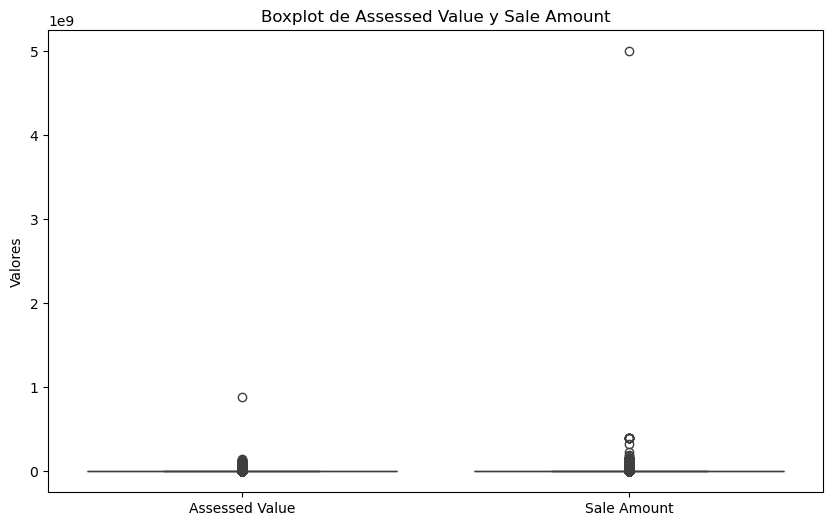

In [8]:
#se pasa a formato date time la columna de Date Recorded
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], dayfirst=True)

#se aplica un boxplot para ver si hay valores atipicos en las columnas de Assessed Value y Sale Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Assessed Value', 'Sale Amount']])
plt.title('Boxplot de Assessed Value y Sale Amount')
plt.ylabel('Valores')
plt.xticks([0, 1], ['Assessed Value', 'Sale Amount'])
plt.show()
	

Se determina los limites superiores e inferiores de ambas columnas para eliminar los datos atipicos presentes

In [9]:
def limites(df, columna):
    Q1 = df[f'{columna}'].quantile(0.25) #se calcula el primer cuartil
    Q3 = df[f'{columna}'].quantile(0.75) #se calcula el segundo cuartil
    IQR = Q3 - Q1 #se calcula el rengo intercuartilico

    limite_superior = Q3 + 1.5 * IQR #se calcual el limite superior
    limite_inferior = max(0, Q1 - 1.5 * IQR) #se calcula el limite inferior

    ''' 
    se usa max(0, ) por si el limite es negativo se cambie a 0 ya que
    no se necesita un limite inferior negativo
    '''
    
    return print(f'limites de la columna {columna}: limite superior: {limite_superior}. limite inferior: {limite_inferior}')

#se calculan los limites de las columnas Assed Value y Sale Amount
limites(df, 'Assessed Value')
limites(df, 'Sale Amount')

limites de la columna Assessed Value: limite superior: 432500.0. limite inferior: 0
limites de la columna Sale Amount: limite superior: 702500.0. limite inferior: 0


Se filtran ambas columnas con los limites calculados y se grafican

In [10]:
df = df[
    (df['Assessed Value'] <= 432500.0) & (df['Assessed Value'] >= 0) &
    (df['Sale Amount'] <= 702500.0) & (df['Sale Amount'] >= 0)
]

df.describe()

,List Year,Date Recorded,Assessed Value,Sale Amount
count,889514.000000,889512,889514.000000,889514.000000
mean,2010.085636,2011-05-11 13:10:47.675578880,143551.495789,232185.564525
min,2001.000000,1999-04-05 00:00:00,0.000000,0.000000
25%,2004.000000,2005-06-22 00:00:00,82500.000000,132000.000000
50%,2010.000000,2010-10-29 00:00:00,126810.000000,207000.000000
75%,2016.000000,2017-03-08 00:00:00,189350.000000,310000.000000
max,2020.000000,2021-09-30 00:00:00,432500.000000,702500.000000
std,6.264553,NaN,85939.846938,140211.811023


Ya filtradas se busca que no allan valores duplicados

In [11]:
#saber si hay duplicados 
duplicados_av = df.duplicated(subset='Assessed Value').sum()
duplicados_sa = df.duplicated(subset='Sale Amount').sum()

print(f'Duplicados en Assessed Value: {duplicados_av}\nDuplicados en Sale Amount: {duplicados_sa}')


Duplicados en Assessed Value: 840611
Duplicados en Sale Amount: 843973


In [12]:
#se hace un dataframe con los duplicados para evaluar si afectan en el analisis y asi saber que hacer con ellos
df_duplicados = df[df.duplicated(subset=['Assessed Value', 'Sale Amount'], keep=False)]

print(f"Total de registros duplicados: {len(df_duplicados)}")
print(f"Proporción de duplicados: {len(df_duplicados) / len(df) * 100:.2f}%")

Total de registros duplicados: 244666
Proporción de duplicados: 27.51%


Se eliminaran las filas donde toda la fila sea duplicada por completo, y se dejaran las filas donde solo 'Assessed Value' y 'Sale Amount' sean duplicadas ya que son transacciones que realmente sucedieron y no datos falsos

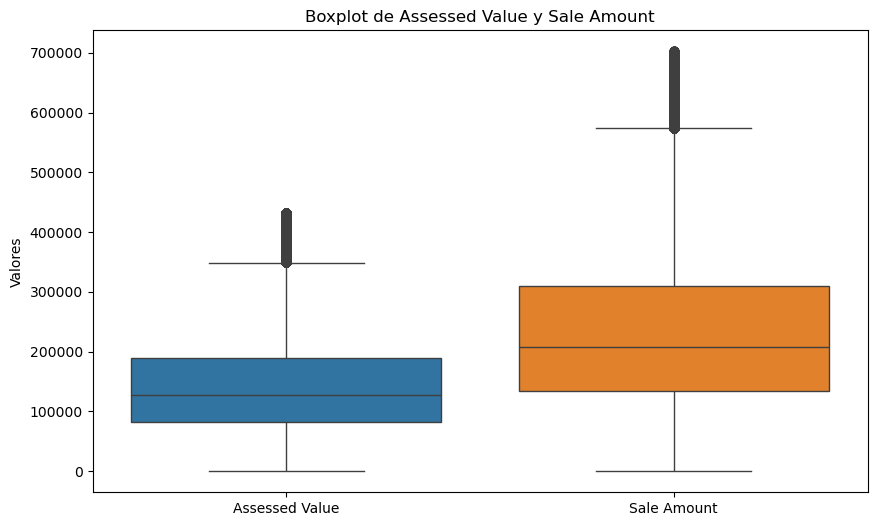

In [13]:
#se elimina solo las filas completamente duplicadas
df = df.drop_duplicates(keep='first')

#boxplot de Assessed Value y Sale Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Assessed Value', 'Sale Amount']])
plt.title('Boxplot de Assessed Value y Sale Amount')
plt.ylabel('Valores')
plt.xticks([0, 1], ['Assessed Value', 'Sale Amount'])
plt.show()

Ya las columnas Assessed Value y Sale Amount estan limpias y listas para el analisis, ahora empiezo con la limpieza de las columnas categoricas faltantes

In [14]:
#poner todos los nombres de las columnas en minuscula
df.columns = df.columns.str.lower()

#se eliminan espacios en blanco
for col in ['property type', 'residential type', 'town']:
    df[col] = df[col].str.strip().str.title()

#se reemplaza valores nulos o vacíos por un valor estándar
for col in ['property type', 'residential type', 'town']:
    df[col] = df[col].fillna('Unknown')

## Resulucion de preguntas del proyecto

1. Cual es el ingreso anual de las propiedades vendidas?

In [15]:
df

,list year,date recorded,assessed value,sale amount,property type,residential type,town
0,2020,2021-09-13,150500.0,325000.0,Commercial,Does Not Apply,Ansonia
1,2020,2020-10-02,253000.0,430000.0,Residential,Single Family,Ashford
2,2020,2021-03-09,130400.0,179900.0,Residential,Condo,Avon
6,2020,2021-03-01,234200.0,130000.0,Residential,Two Family,Berlin
7,2020,2021-07-01,412000.0,677500.0,Residential,Single Family,Berlin
...,...,...,...,...,...,...,...
997206,2019,2019-11-18,125230.0,246000.0,Single Family,Single Family,West Haven
997208,2019,2020-06-24,60410.0,53100.0,Single Family,Single Family,New London
997209,2019,2019-11-27,68280.0,76000.0,Single Family,Single Family,Waterbury
997210,2019,2020-04-27,121450.0,210000.0,Single Family,Single Family,Windsor Locks


In [16]:
#agrupo los datos por años y se suman los ingresos en total de cada uno
df['year'] = df['date recorded'].dt.year
ingreso_anual_de_ventas = df.groupby(['year'])['sale amount'].sum()
pd.set_option('display.float_format', '{:,.0f}'.format) #con esto uso notacion decimal en los resultados
print(ingreso_anual_de_ventas)

year
1,999           95,000
2,001    2,486,101,945
2,002   11,187,794,655
2,003   10,938,434,608
2,004   15,478,886,306
2,005   17,794,774,221
2,006   13,343,127,300
2,007   10,384,739,921
2,008    7,237,215,434
2,009    7,001,793,119
2,010    7,258,269,402
2,011    5,750,921,102
2,012    5,702,951,799
2,013    7,101,018,911
2,014    8,005,710,166
2,015    9,442,583,360
2,016    9,464,470,008
2,017    9,673,968,625
2,018    9,591,786,127
2,019   11,154,207,750
2,020   14,190,086,057
2,021   11,712,503,449
Name: sale amount, dtype: float64


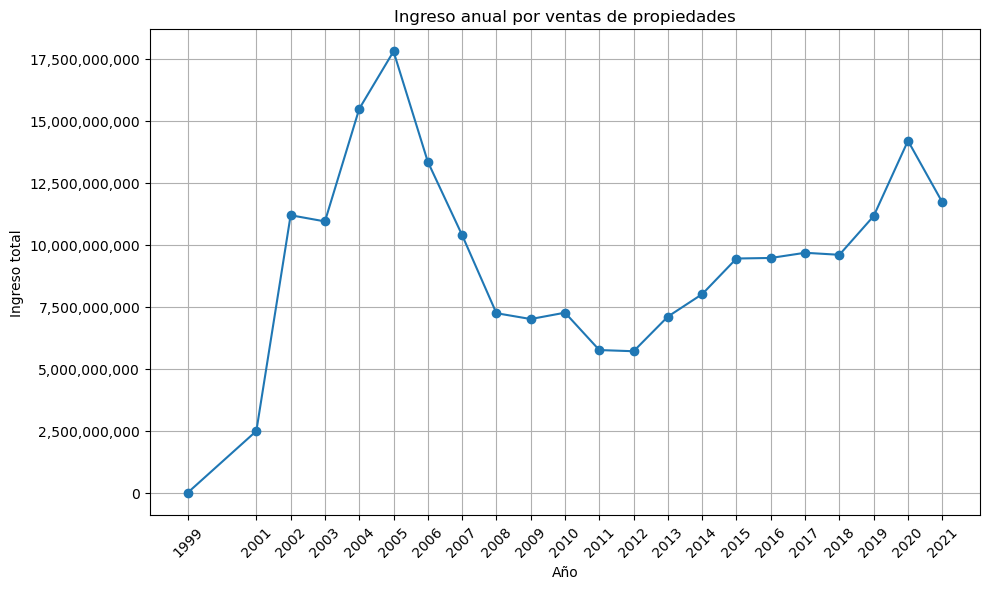

In [17]:
# se ordena el indice
ingreso_anual_de_ventas = ingreso_anual_de_ventas.sort_index()

#Grafico lineal para reprenstar el incremento de las ganancias anuales atraves del tiempo
plt.figure(figsize=(10, 6))
ingreso_anual_de_ventas.plot(kind='line', marker='o')
plt.title('Ingreso anual por ventas de propiedades')
plt.xlabel('Año')
plt.ylabel('Ingreso total')
plt.grid(True)
plt.xticks(ingreso_anual_de_ventas.index, rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

2.  Que tipo de propiedad tiene mayor facilidad de venta

In [18]:
#se sacara un porcentage de venta de las propiedades con mayor facilidad de venta
df['property type'].value_counts()

property type
Single Family     347952
Not Specified     336214
Condo              99575
Residential        52583
Two Family         25455
Three Family       12299
Vacant Land         2800
Four Family         2053
Commercial          1106
Apartments           319
Industrial            94
Public Utility         4
Name: count, dtype: int64

In [19]:
#se hace una lista con los tipos de propiedades
tipos_de_propiedades = [
    'Single Family', 'Not Specified', 'Condo', 'Residential', 'Two Family',
    'Three Family', 'Vacant Land', 'Four Family', 'Commercial', 'Apartments',
    'Industrial', 'Public Utility'
    ]

'''  
con un for se itera sobre la lista y se filtran las 
propiedades que tengan un Sale Amount mayor a 0
y se saca el porcentaje de venta de cada tipo de propiedad
'''

for i in tipos_de_propiedades:

    cantidad = df[df['property type'] == i].shape[0]

    propiedades_vendidas = df[
        (df['sale amount'] > 0) & (df['property type'] == i)
    ].shape[0]

    propiedades_vendidas_porcentaje = (propiedades_vendidas / cantidad) * 100
    print(f'Las propiedades tipo {i} se han vendido el {propiedades_vendidas_porcentaje:.2f}%')
    


Las propiedades tipo Single Family se han vendido el 99.97%
Las propiedades tipo Not Specified se han vendido el 99.56%
Las propiedades tipo Condo se han vendido el 99.99%
Las propiedades tipo Residential se han vendido el 100.00%
Las propiedades tipo Two Family se han vendido el 99.98%
Las propiedades tipo Three Family se han vendido el 100.00%
Las propiedades tipo Vacant Land se han vendido el 100.00%
Las propiedades tipo Four Family se han vendido el 99.95%
Las propiedades tipo Commercial se han vendido el 100.00%
Las propiedades tipo Apartments se han vendido el 100.00%
Las propiedades tipo Industrial se han vendido el 100.00%
Las propiedades tipo Public Utility se han vendido el 100.00%


3. En cual ciudad se dan mayor cantidad de ventas de propiedades? Y que elementos particulares tienen esas ciudades o pueblos?

In [20]:
df

,list year,date recorded,assessed value,sale amount,property type,residential type,town,year
0,2020,2021-09-13,"150,500","325,000",Commercial,Does Not Apply,Ansonia,"2,021"
1,2020,2020-10-02,"253,000","430,000",Residential,Single Family,Ashford,"2,020"
2,2020,2021-03-09,"130,400","179,900",Residential,Condo,Avon,"2,021"
6,2020,2021-03-01,"234,200","130,000",Residential,Two Family,Berlin,"2,021"
7,2020,2021-07-01,"412,000","677,500",Residential,Single Family,Berlin,"2,021"
...,...,...,...,...,...,...,...,...
997206,2019,2019-11-18,"125,230","246,000",Single Family,Single Family,West Haven,"2,019"
997208,2019,2020-06-24,"60,410","53,100",Single Family,Single Family,New London,"2,020"
997209,2019,2019-11-27,"68,280","76,000",Single Family,Single Family,Waterbury,"2,019"
997210,2019,2020-04-27,"121,450","210,000",Single Family,Single Family,Windsor Locks,"2,020"


In [21]:
ciudades = df['town'].value_counts()

#con esto saco la ciudad con mas ventas
ciudad_mas_ventas = ciudades.idxmax()
cantidad_mas_ventas = ciudades.max()

print(f'La ciudad con más ventas es {ciudad_mas_ventas} con {cantidad_mas_ventas} ventas')

La ciudad con más ventas es Bridgeport con 31565 ventas


In [22]:
#con el describe quiero ver el promedio de assessed value y sale amount para compararlo mas adelante
df.describe()

,list year,date recorded,assessed value,sale amount,year
count,"880,454",880453,"880,454","880,454","880,453"
mean,"2,010",2011-05-20 05:48:21.771246848,"143,521","232,722","2,011"
min,"2,001",1999-04-05 00:00:00,0,0,"1,999"
25%,"2,004",2005-06-28 00:00:00,"82,530","133,500","2,005"
50%,"2,010",2010-11-18 00:00:00,"126,800","208,000","2,010"
75%,"2,016",2017-03-17 00:00:00,"189,200","310,000","2,017"
max,"2,020",2021-09-30 00:00:00,"432,500","702,500","2,021"
std,6,NaN,"85,809","139,870",6


In [23]:
#buscar elementos particulares que tengan en comun
df_similitudes = df[df['town'] == 'Bridgeport'][['town', 'assessed value', 'sale amount', 'property type', 'residential type', 'date recorded']]

df_similitudes.sort_values(by=['assessed value','sale amount'],ascending=False)


,town,assessed value,sale amount,property type,residential type,date recorded
523442,Bridgeport,"432,180","109,880",Single Family,Single Family,2010-04-12
386240,Bridgeport,"431,333","700,000",Not Specified,Unknown,2007-04-23
390934,Bridgeport,"431,309","600,000",Not Specified,Unknown,2006-11-13
638877,Bridgeport,"429,840","350,000",Not Specified,Unknown,2013-07-29
718242,Bridgeport,"429,250","525,000",Not Specified,Unknown,2015-07-06
...,...,...,...,...,...,...
250435,Bridgeport,0,0,Not Specified,Unknown,2005-09-19
258404,Bridgeport,0,0,Not Specified,Unknown,2005-03-03
265933,Bridgeport,0,0,Not Specified,Unknown,2005-09-22
331737,Bridgeport,0,0,Not Specified,Unknown,2005-12-22


In [24]:
''' 
antes de seguir quiero ver cuantas columnas hay con 
#sale amount y assessed value en 0 ya que puede afectar en el analisis
'''

ceros = df[
    (df['sale amount'] == 0) & (df['assessed value'] == 0)
].shape[0]

total_de_filas = df[['assessed value', 'sale amount']].shape[0]

porcentaje = (ceros / total_de_filas) * 100

print(f'El porcentaje de filas con assessed value y sale acount en 0 es del {porcentaje:.2f}%')

El porcentaje de filas con assessed value y sale acount en 0 es del 0.03%


como el porcentaje es de menos el 1% no voy a borrar ni imputar nada ya que no afecta el analisis

In [25]:
promedio_av = df_similitudes['assessed value'].mean()
promedio_sa = df_similitudes['sale amount'].mean()

print(f'el promedio de sale amount en las propiedades en Bridgeport es: {promedio_sa:.2f}')
print(f'el promedio de assessed value en las propiedades en Bridgeport es: {promedio_av:.2f}')

el promedio de sale amount en las propiedades en Bridgeport es: 170485.37
el promedio de assessed value en las propiedades en Bridgeport es: 112295.33


con esto vemos que las propiedades en Bridgeport tienen en comun que estan abajo del promedio en assessed value y sale acount, por ende se venden mas propiedades al ser mas baratas

In [26]:
df_similitudes['residential type'].value_counts()

residential type
Unknown           13666
Single Family      8417
Condo              3885
Two Family         3216
Three Family       2069
Four Family         311
Does Not Apply        1
Name: count, dtype: int64

In [27]:
df_similitudes['property type'].value_counts()

property type
Not Specified    13666
Single Family     8410
Condo             3885
Two Family        3214
Three Family      2068
Four Family        311
Residential         10
Commercial           1
Name: count, dtype: int64

Con esto tambien vemos que que tambien tienen en comun que el tipo de propiedad mas comprado es Single Family

4. cual es el costo promedio de las propiedades recidenciales y comerciales

In [28]:
#declaro dos variables que contengan el promedio del costo de las propiedades recidenciales y comerciales
promedio_comercial = df[df['property type'] == 'Commercial']['sale amount'].mean()
promedio_resindencial = df[df['property type'] == 'Residential']['sale amount'].mean()

#imprimo el costo promedio de ambas
print(f'Costo promedio de propiedades comerciales: {promedio_comercial:.2f}')
print(f'Costo promedio de propiedades residenciales: {promedio_resindencial:.2f}')

Costo promedio de propiedades comerciales: 273866.85
Costo promedio de propiedades residenciales: 289510.09


5. Cual es el tipo de propiedades residenciales que se venden con mayor frecuencia, donde y con que costo promedio

In [29]:
#agrupo por tipo de recidencial y ciudad y saco el precio promedio por ciudad
df_5 = df.groupby(['residential type', 'town'])['sale amount'].agg(['mean', 'count'])
df_5 = df_5.sort_values(by='count' ,ascending=False)
print(df_5)

                                  mean  count
residential type town                        
Unknown          Bridgeport    185,581  13666
                 Stamford      363,361  11277
Single Family    Waterbury     122,733  10441
Unknown          Waterbury     132,498  10063
                 Hartford      157,807   9420
...                                ...    ...
Single Family    ***Unknown*** 282,450      1
Condo            Lebanon       163,500      1
Does Not Apply   Bridgeport     60,000      1
Condo            Voluntown     126,800      1
Three Family     Ledyard       345,000      1

[1022 rows x 2 columns]


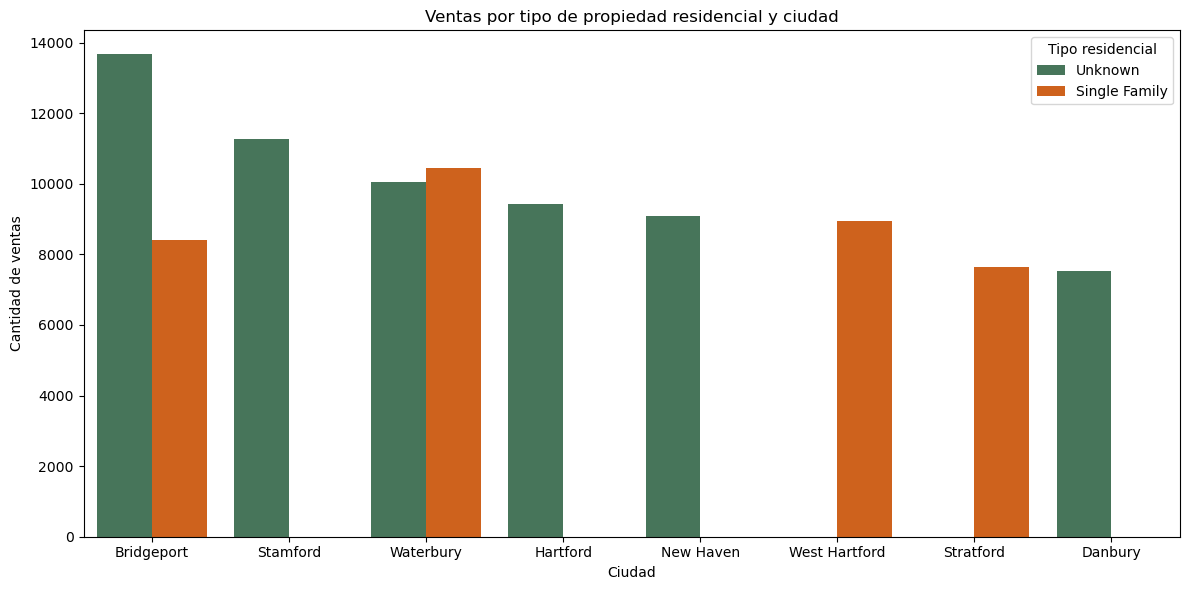

In [30]:

top = df_5.reset_index().sort_values('count', ascending=False).head(10)

custom_palette = ['#3F7D58', '#EB5B00']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top,
    x='town',
    y='count',
    hue='residential type',
    palette=custom_palette
)
plt.title('Ventas por tipo de propiedad residencial y ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Tipo residencial')
plt.tight_layout()
plt.show()

6. cual es el margen promedio de ganacia por cada una de las propiedades vendidas

In [39]:
#consigo el valor promedio de la tasacion de las propiedades
valor_tasado_promedio = df['assessed value'].mean()

#consigo el promedio del valor de las ventas
valor_de_venta_promedio = df['sale amount'].mean()

#obtengo el marge de ganacia promedio
ganancia = valor_de_venta_promedio - valor_tasado_promedio

print(f'el margen de ganacia promedio por cada propiedad vendida es de: {ganancia:.2f}')
print(f'la tasacion promedio por cada propiedad es de: {valor_tasado_promedio:.2f}')
print(f'la venta promedio por cada propiedad vendida es de: {valor_de_venta_promedio:.2f}')

el margen de ganacia promedio por cada propiedad vendida es de: 89201.03
la tasacion promedio por cada propiedad es de: 143521.45
la venta promedio por cada propiedad vendida es de: 232722.48
